<a href="https://colab.research.google.com/github/leidyvereno/REDES-NEURONALES/blob/main/parcial_1_leidy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1: Modo de Aprendizaje (Entrenamiento de la Red Neuronal)

In [ ]:
#Importar librerias necesarias
import tensorflow as tf
from tensorflow import keras

#Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Normalizar los datos (escala de 0 a 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

#Definir la Red Neural
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Capa de entrada
    keras.layers.Dense(128, activation='relu'), # Capa oculta
    keras.layers.Dense(10, activation='softmax') # Capa de Salida(10 clases)
])

#Compilar el modelo (modo de aprendizaje)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Entrenar la Red Neuronal
print("Modo de Aprendizaje: Entrenando la Red Neuronal...")
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Modo de Aprendizaje: Entrenando la Red Neuronal...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8796 - loss: 0.4273 - val_accuracy: 0.9589 - val_loss: 0.1355
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9630 - loss: 0.1249 - val_accuracy: 0.9700 - val_loss: 0.0973
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9770 - loss: 0.0772 - val_accuracy: 0.9733 - val_loss: 0.0876
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9829 - loss: 0.0571 - val_accuracy: 0.9763 - val_loss: 0.0766
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9877 - loss: 0.0407 - val_accuracy: 0.9746 - val_loss: 0.0815


Cambio 1

In [11]:
#Entrenar el modelo
model.fit(x_train, y_train, epochs=3)

#Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc:.4f}')

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9820 - loss: 0.0581
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9866 - loss: 0.0434
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9896 - loss: 0.0338
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9746 - loss: 0.0897
Precisión en el conjunto de prueba: 0.9777


Cambio 2

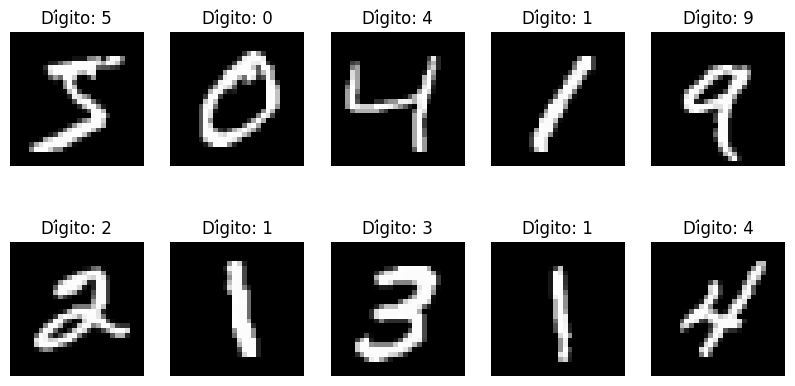

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8727 - loss: 0.4461
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9647 - loss: 0.1230
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9761 - loss: 0.0818
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9687 - loss: 0.1060
Precisión en el conjunto de prueba: 0.9730


In [10]:
# Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt  # Para visualizar las imágenes

# Cargar y preparar los datos de MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizar los datos (valores entre 0 y 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Mostrar algunas imágenes de ejemplo
plt.figure(figsize=(10, 5))  # Tamaño de la figura
for i in range(10):  # Mostrar 10 imágenes
    plt.subplot(2, 5, i+1)  # Organizar en 2 filas y 5 columnas
    plt.imshow(x_train[i], cmap='gray')  # Mostrar la imagen en escala de grises
    plt.title(f'Dígito: {y_train[i]}')  # Título con la etiqueta real
    plt.axis('off')  # Quitar ejes
plt.show()  # Mostrar todas las imágenes

# Crear un modelo simple
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Aplanar las imágenes de 28x28 a un vector
    layers.Dense(128, activation='relu'),  # Capa densa con 128 neuronas
    layers.Dense(10, activation='softmax') # Capa de salida con 10 clases
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train, y_train, epochs=3)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc:.4f}')

Ejercicio 2:Modo de Recuerdo (Inferencia o Prediccion)

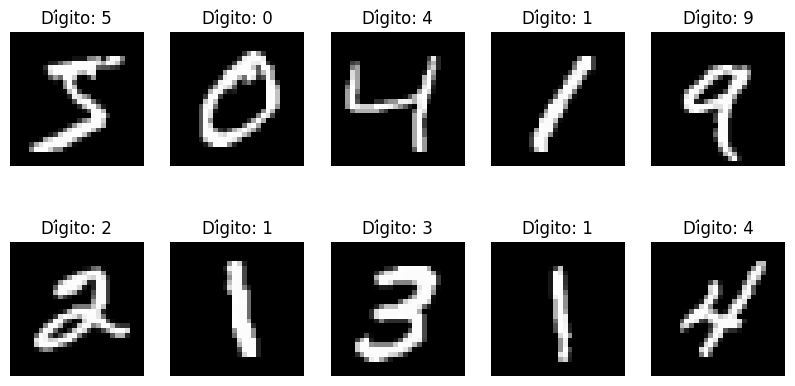

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          80,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,674 (319.04 KB)

 Trainable params: 81,674 (319.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7912 - loss: 0.6343
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9664 - loss: 0.1085
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9781 - loss: 0.0728
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9719 - loss: 0.0868
Precisión en el conjunto de prueba: 0.9785


In [9]:
# Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt  # Para visualizar las imágenes

# Cargar y preparar los datos de MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizar los datos (valores entre 0 y 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Mostrar algunas imágenes de ejemplo
plt.figure(figsize=(10, 5))  # Tamaño de la figura
for i in range(10):  # Mostrar 10 imágenes
    plt.subplot(2, 5, i+1)  # Organizar en 2 filas y 5 columnas
    plt.imshow(x_train[i], cmap='gray')  # Mostrar la imagen en escala de grises
    plt.title(f'Dígito: {y_train[i]}')  # Título con la etiqueta real
    plt.axis('off')  # Quitar ejes
plt.show()  # Mostrar todas las imágenes

# Crear un modelo con memoria (LSTM)
model = models.Sequential([
    layers.Input(shape=(28, 28)),  # 28 pasos de tiempo (filas), 28 características (píxeles por fila)
    layers.LSTM(128, return_sequences=False),  # Capa LSTM con 128 unidades, sin devolver secuencias
    layers.Dense(10, activation='softmax')  # Capa de salida con 10 clases
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Resumen del modelo
model.summary()

# Entrenar el modelo
model.fit(x_train, y_train, epochs=3)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc:.4f}')

Ejercicio 3 #Elegir el digito especifico que quieres predecir (0-9)

Entrenando el modelo...
Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7370 - loss: 0.8375
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9148 - loss: 0.3014
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9332 - loss: 0.2356

Precisión en el conjunto de prueba: 0.9428


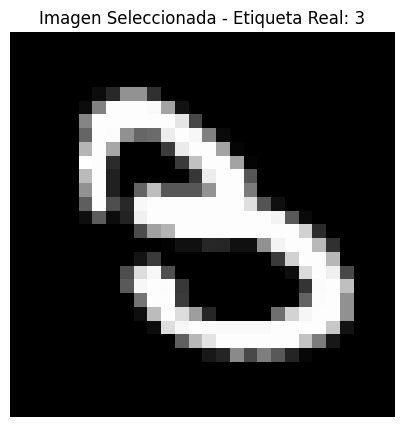


Prediccion del modelo: 3
Probabilidades para cada clase:
Clase 0: 0.0045
Clase 1: 0.0318
Clase 2: 0.2817
Clase 3: 0.6654
Clase 4: 0.0002
Clase 5: 0.0033
Clase 6: 0.0015
Clase 7: 0.0002
Clase 8: 0.0112
Clase 9: 0.0001

Etiqueta real: 3
¡El modelo acertó en su predicción!


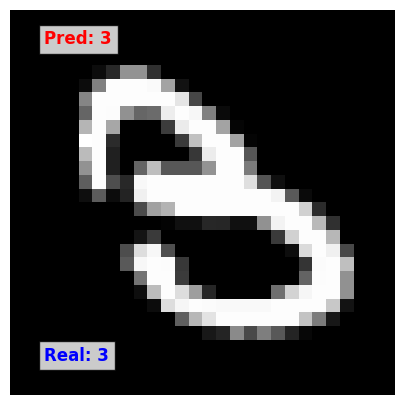

In [8]:
#Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Cargar y preparar los datos de MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#Normalizar los datos (valores entre 0 y 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

#Crear un modelo con memoria simple (SimpleRNN)
model = models.Sequential([
    layers.Input(shape=(28, 28)),  # 28 pasos de tiempo (filas), 28 características (píxeles por fila)
    layers.SimpleRNN(64),  # Capa SimpleRNN con 64 unidades
    layers.Dense(10, activation='softmax')  # Capa de salida con 10 clases
])

#Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Entrenar el modelo
print("Entrenando el modelo...")
model.fit(x_train, y_train, epochs=3, verbose=1)

#Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nPrecisión en el conjunto de prueba: {test_acc:.4f}")

#Elegir el digito especifico que quieres predecir (0-9)
digito_deseado = 3 #Cambia este numero (0-9) para predecir el digito que quieras

#Buscar una imagen en x_test que sea el digito deseado
indice = None
for i in range(len(x_test)):
  if y_test[i] == digito_deseado:
    indice = i
    break

if indice is not None:
  #Seleccionar la imagen y su etiqueta real
  imagen_prueba = x_test[indice]
  etiqueta_real = y_test[indice]

  #Mostrar la imagen Seleccionada
  plt.figure(figsize=(5, 5))
  plt.imshow(imagen_prueba, cmap='gray')
  plt.title(f'Imagen Seleccionada - Etiqueta Real: {etiqueta_real}')
  plt.axis('off')
  plt.show()

  #Realizar la prediccion
  imagen_prueba_reshape = np.expand_dims(imagen_prueba, axis=0)
  prediccion = model.predict(imagen_prueba_reshape, verbose=0)
  digito_predicho = np.argmax(prediccion)

  #Mostrar la prediccion y probabilidades
  print(f"\nPrediccion del modelo: {digito_predicho}")
  print("Probabilidades para cada clase:")
  for i, prob in enumerate(prediccion[0]):
    print(f"Clase {i}: {prob:.4f}")

  #Comparar el resultado con la etiqueta real
  print(f"\nEtiqueta real: {etiqueta_real}")
  if digito_predicho == etiqueta_real:
    print("¡El modelo acertó en su predicción!")
  else:
    print("El modelo no acertó en su predicción.")

  #Visualizacion final con predicción real
  plt.figure(figsize=(5, 5))
  plt.imshow(imagen_prueba, cmap='gray')
  plt.text(2, 2, f'Pred: {digito_predicho}', color='red', fontsize=12, weight='bold',
           bbox=dict(facecolor='white', alpha=0.8))
  plt.text(2, 25, f'Real: {etiqueta_real}', color='blue', fontsize=12, weight='bold',
           bbox=dict(facecolor='white', alpha=0.8))
  plt.axis('off')
  plt.show()

else:
  print(f"No se encontró ninguna imagen con el dígito {digito_deseado} en el conjunto de prueba.")